## Cat-vs-Dog Using CNN MODEL


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
# !kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:27<00:00, 42.9MB/s]
100% 1.06G/1.06G [00:27<00:00, 42.0MB/s]


In [6]:
import zipfile 
# zip_ref = zipfile.ZipFile("/content/microsoft-catsvsdogs-dataset.zip", "r")
# zip_ref.extractall("/content/catsvsdogs-dataset")
# zip_ref.close()

In [7]:
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip", "r")
zip_ref.extractall("/content/catsvsdogs")
zip_ref.close()

In [8]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import splitfolders
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/catsvsdogs-dataset/PetImages", output="Splited-Dataset",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values

ValueError: ignored

In [12]:
import pandas as pd
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [13]:
train_dataset = keras.utils.image_dataset_from_directory(
    directory="/content/catsvsdogs/train",
    # directory="/content/Splited-Dataset/train",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(264, 264)
)

test_dataset = keras.utils.image_dataset_from_directory(
    directory="/content/catsvsdogs/test",
    # directory="/content/Splited-Dataset/test",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(264, 264),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [16]:
# Normalize 
def process(image, label):
  image = tf.cast(image/255.0, tf.float32)
  return image, label

train_dataset = train_dataset.map(process)
test_dataset = test_dataset.map(process)
# valation_dataset = val_dataset.map(process)

## MODEL 

In [17]:
#initializing the cnn
model = Sequential()

model.add(Convolution2D(64,3,3,input_shape=(264,264,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 88, 88, 64)        1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 44, 44, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 123904)            0         
                                                                 
 dense_3 (Dense)             (None, 128)               15859840  
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                      

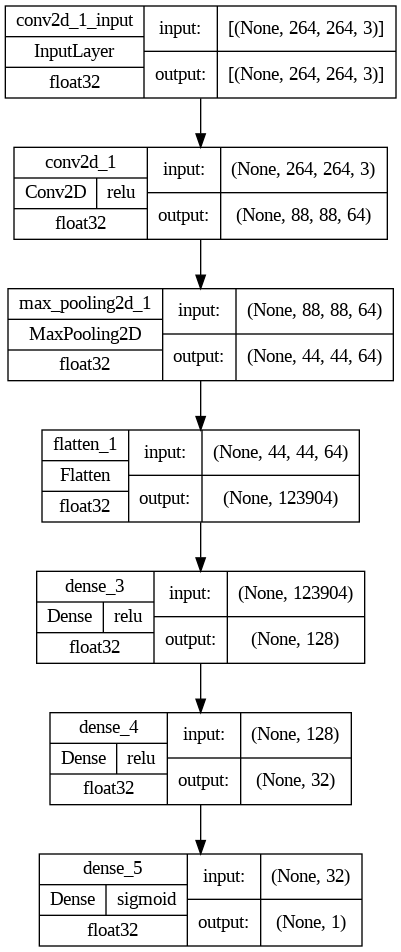

In [18]:
keras.utils.plot_model(
    model, show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

In [19]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(train_dataset,
          epochs=10,
          validation_data=test_dataset)

Epoch 1/10
625/625 [==============================] - 62s 82ms/step - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
625/625 [==============================] - 50s 80ms/step - loss: 0.6932 - accuracy: 0.4935 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
110/625 [====>.........................] - ETA: 38s - loss: 0.6932 - accuracy: 0.4952

In [10]:
model.save("model.h5")

NameError: ignored

In [ ]:
model = keras.models.load_model('model.h5')

In [ ]:
pred = model.predict(test_dataset)

In [ ]:
pred

In [11]:
# from keras.preprocessing import image
import keras.utils as image
  
#Input image
test_image = image.load_img('/content/catsvsdogs/test/cats/cat.10021.jpg',
                                      target_size=(264,264))
  
#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
  
# Result array
result = model.predict(test_image)
  
#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("Dog")
else:
  print("Cat")

NameError: ignored